In [18]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import operator
pd.options.display.max_colwidth = 300
import config
data_root= config.DATA_ROOT

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import collect_tweets

In [45]:
df=pd.read_pickle(data_root+'tweets-priv.pkl')
print("# of privacy related tweets: {}\n# of unique users who tweeted:{}".format(len(df), len(df.author_id.unique())))

# of privacy related tweets: 216667
# of unique users who tweeted:90579


In [122]:
user_df = pd.read_pickle(data_root+'users-en-unique.pkl')
print('total # of users', len(user_df))


total # of users 1698096


In [49]:
deleted_users = set(df.author_id.unique()).difference(user_df.index)
print('# of users who tweeted sec-priv tweets but deleted their accounts:', len(deleted_users))
current_users = set(df.author_id).intersection(user_df.index)
print('# of users who tweeted sec-priv tweets and have their accounts:', len(current_users))
user_df=user_df.loc[list(current_users)]

# of users who tweeted sec-priv tweets but deleted their accounts: 26772
# of users who tweeted sec-priv tweets and have their accounts: 63807


In [88]:
df["created_at"] = pd.to_datetime(df["created_at"])

In [93]:
df.created_at.min(), df.created_at.max()

(Timestamp('2007-04-11 03:15:12+0000', tz='UTC'),
 Timestamp('2022-02-19 21:17:19+0000', tz='UTC'))

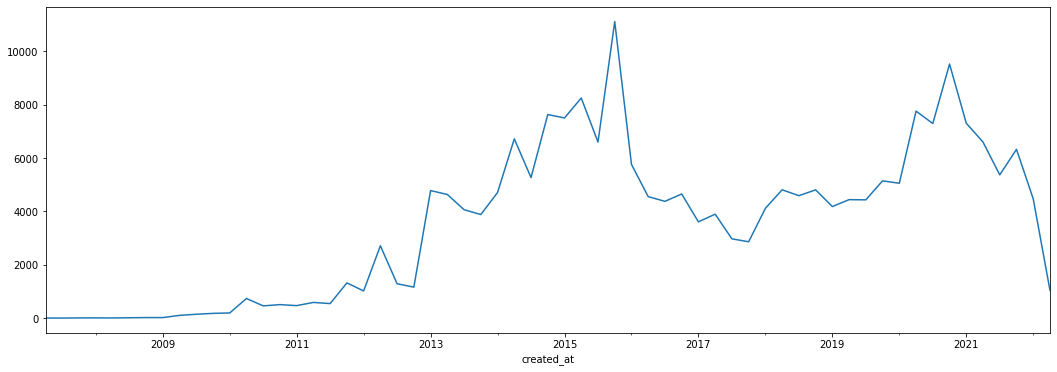

In [108]:
plt.figure(figsize=(18,6))
df.reset_index().set_index('created_at').groupby(pd.Grouper(freq='3M')).text.count().plot()
plt.title('')
plt.show()

## Tweet topics and sentiment

In [52]:
def remove_comp(senti):
    if 'compound' in senti:
        senti.pop('compound')
    return senti
df['senti2'] = df.apply(lambda tweet: remove_comp(tweet.senti), axis=1)
df['senti2'] = df.apply(lambda tweet: max(tweet.senti2.items(), key=operator.itemgetter(1))[0], axis=1)

In [53]:
priv_topics = [line.split(':')[1] for line in open('priv-tweet-topics.txt')]
for pt in range(len(priv_topics)):
    print(pt, priv_topics[pt].strip())

0 facebook austrian court reuters europe vienna european setback schrems luxembourg
1 username daily watch stories ibanyan wisdom usernames partena
2 edchat ukedchat iloveedtech edtools isedchat teachertwitter sschat njed tosachat edtechsr
3 referring syracuse divulge spokesperson phled fafsa fairfax diagnosis msulawday abcs
4 gitex agile careerdevelopment softwaredevelopment courseswithcertificate newyear projectmanagement nodejs agdev courseware
5 policy policies tips practices program resources guide steps practice implement
6 beef safari mozilla galaxy newsela wikipedia logo gchq canvaslms techcrunch
7 surveillance surveilling undercover disappearance bicyclist helicopter georgetown montgomery wheelchair poisoning
8 cybersecurity onlinelearning educationforall cybersecurite techforgood lifelonglearning microlearning shakeuplearning mobilelearning cybersecurecanada
9 bipartisan massachusetts mnleg sotu hampshire leoniehaimson epicprivacy potus thehill utpol
10 security byod mobile m

In [54]:
df.groupby('topic').text.count().sort_values(ascending=False)#.head(10)

topic
 12    79134
 1     43798
 10    43632
 8      9804
 15     9083
 7      9044
 0      7107
 19     5312
 5      3675
 18     3299
 2      1212
-1      1017
 13      290
 4        97
 6        72
 9        47
 3        27
 11        6
 16        6
 17        4
 14        1
Name: text, dtype: int64

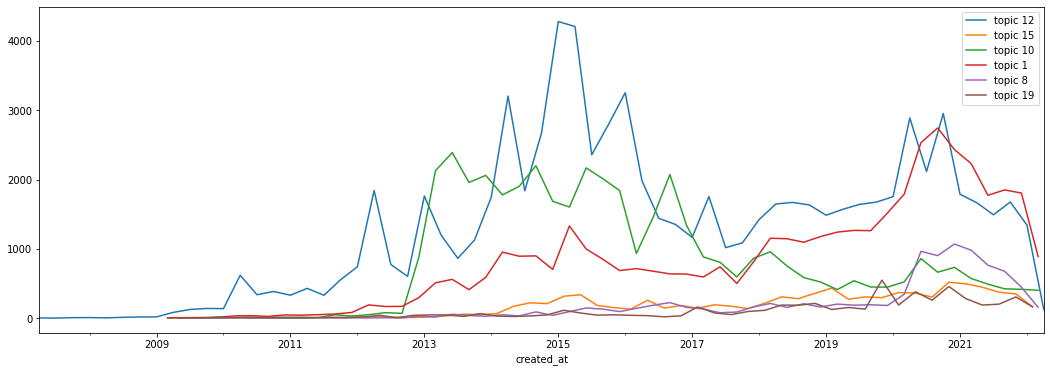

In [113]:
plt.figure(figsize=(18,6))
df[df.topic==12].reset_index().set_index('created_at').groupby(pd.Grouper(freq='3M')).text.count().plot(label='topic 12')
df[df.topic==15].reset_index().set_index('created_at').groupby(pd.Grouper(freq='3M')).text.count().plot(label='topic 15')
df[df.topic==10].reset_index().set_index('created_at').groupby(pd.Grouper(freq='3M')).text.count().plot(label='topic 10')
df[df.topic==1].reset_index().set_index('created_at').groupby(pd.Grouper(freq='3M')).text.count().plot(label='topic 1')
df[df.topic==8].reset_index().set_index('created_at').groupby(pd.Grouper(freq='3M')).text.count().plot(label='topic 8')
df[df.topic==19].reset_index().set_index('created_at').groupby(pd.Grouper(freq='3M')).text.count().plot(label='topic 19')
plt.legend()
plt.show()

### Tweets on topic 12

In [68]:
df[df.topic==12].groupby('senti2').text.count().sort_values(ascending=False)#.sample(5)[['text','created_at', 'senti2']]

senti2
neu    77557
neg     1005
pos      572
Name: text, dtype: int64

In [80]:
df[(df.topic==12) & (df.senti2=='neg')].sample(5)[['text','created_at', 'senti2']]

,text,created_at,senti2
tweetid,,,
9572501923,Google executives found guilty of violating privacy of student bullied on video http://su.pr/1NphRY,2010-02-24 11:51:51+00:00,neg
542196844122488833,Lawsuit charges Ed Department with violating student privacy rights http://t.co/pLHzjA5BiW,2014-12-09 05:59:35+00:00,neg
638556580653371392,Avoid mistakes #onlinelearning student data #privacy http://t.co/jLnacK156b,2015-09-01 03:38:47+00:00,neg
14412365116,"School violated student's privacy in 'sexting' case, lawsuit says http://on.cnn.com/b1t0Ys",2010-05-21 06:52:58+00:00,neg
894429040742400,Suicide may test law on privacy: The case of a Rutgers University student who committed suicide after a roommate... http://bit.ly/cKnEf6,2010-11-06 12:57:03+00:00,neg


In [128]:
users = user_df.loc[set(df[df.topic==12].author_id).intersection(user_df.index)]
users.groupby('user_group').username.count().sort_values(ascending=False)

/var/folders/q5/tcs66y_j6z1bcz8ffp7_1m4r0000gq/T/ipykernel_7855/1855477305.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  users = user_df.loc[set(df[df.topic==12].author_id).intersection(user_df.index)]


user_group
other       11943
brand        7807
academic     7491
tech         2775
Name: username, dtype: int64

In [73]:
df[df.topic==15].groupby('senti2').text.count().sort_values(ascending=False)#.sample(5)[['text','created_at', 'senti2']]

senti2
neu    9016
pos      56
neg      11
Name: text, dtype: int64

In [78]:
df[(df.topic==15) & (df.senti2=='neg')][['text','created_at', 'senti2']]

,text,created_at,senti2
tweetid,,,
638447375107948546,"""Student #privacy be damned! We want to nanny."" &gt; Ucas is harming social mobility by blocking data on poor students - …",2015-08-31 20:24:50+00:00,neg
638445656953212928,"""Student #privacy be damned! We want to nanny."" &gt; Ucas is harming social mobility by blocking data on poor students - http://t.co/nYwkOudf3u",2015-08-31 20:18:01+00:00,neg
1046833375124889600,Ineffective edtech and instruction can punish our poorest and most vulnerable students. Here are strategies for avoiding this outcome. #EWopinion #edtech #K12\nhttps://t.co/jgqXOlPHy9 https://t.co/gLw5Kid65Q,2018-10-01 18:45:00+00:00,neg
1037773679319568384,"Ineffective edtech and instruction, can punish our poorest and most vulnerable students. How can we avoid this? #EWopinion #edtech #K12 \nhttps://t.co/jgqXOlPHy9 https://t.co/AGG1JiQF46",2018-09-06 18:45:00+00:00,neg
1037294270720274432,"Technology can fuel innovation, foster creativity, and create engaging learning environments. At its worst, though, it can punish our poorest and most vulnerable students. Here's how to avoid the paradox. #EWopinion #edtech #K12 \nhttps://t.co/jgqXOly69z https://t.co/x3fj4diP0s",2018-09-05 11:00:00+00:00,neg
1404972294691303424,"@mathillustrated luckily, their workplace software was such a total fail that they abandoned their plans for total lifespan data domination and sold it off \nhttps://t.co/9LiNarp5DW\nbut the LMS is still scary as hell now that it's gone all big-data surveillance AI etc. etc.\nhttps://t.co/5sB4Ja...",2021-06-16 01:21:12+00:00,neg
1425423488802861066,Dutch education IT crisis averted as Google agrees to 'major privacy improvements' https://t.co/aZTIu1gnwJ #EdTech,2021-08-11 11:46:57+00:00,neg
1337484131928862727,This is why I get mad when edtech or tech platforms get applauded \n\nNo one EVER asks what the fuck is going on in schools with privacy \n\nAnd let me tell you it is a mess because half the staff don’t know and the other half are wannabe prison guards https://t.co/GRkU0cBfHH,2020-12-11 19:47:20+00:00,neg
1364095644336447488,surveillance tech should not be the goal in using edtech and we should not be surprised when technology used for racist purposes in the past turns out to be racist in other ways. https://t.co/ui8fuvBmXm,2021-02-23 06:11:59+00:00,neg


In [81]:
df[(df.topic==15) & (df.senti2=='pos')].sample(10)[['text','created_at', 'senti2']]

,text,created_at,senti2
tweetid,,,
637304362851676160,Free #dataprivacy course at @canvasnet https://t.co/Z6u8z8aEqM #eddata,2015-08-28 16:42:55+00:00,pos
980855929045471233,Honored &amp; beyond thrilled to see EdPrivacy by Education Framework selected as an Edtech Digest Cool Tool Award Finalist: Security/Privacy Solution https://t.co/aIePMk1Zo3 @EdFramework @edtechdigest #EdPrivacy #studentprivacy #edtech https://t.co/CCbv2TLkTD,2018-04-02 17:14:11+00:00,pos
919926030982410241,Would it worry you too when a edtech company doesn’t want to sign a data safety and security agreement? #butyouwantmydata,2017-10-16 14:00:31+00:00,pos
1372326233074204683,"It was my pleasure! Always enjoy the opportunity to do some data #privacy training, especially for school districts. #edtech https://t.co/oqAbzZDEH2",2021-03-17 23:17:25+00:00,pos
717113323016298496,How today's tech Is safeguarding schools https://t.co/5ShbezUag3 #edtech #security #safety,2016-04-04 22:15:14+00:00,pos
768497480224964608,Today at 3 pm ET: #Studentprivacy and effective #eddata use go hand in hand. Join in the convo at #ESSAOpps! https://t.co/Y87Z6eY0q1,2016-08-24 17:17:31+00:00,pos
1309144228623249409,Congrats to my great boss @StuAllard for being awarded the EdTech Leadership award and out team for the Cool Tools award for the Kevin Mitnick Security Awareness training! https://t.co/PXt5J4QFX0 #securityawareness #edtech,2020-09-24 14:54:41+00:00,pos
1412830070784286729,Proud to demonstrate our commitment to #studentdataprivacy https://t.co/eDUPzxpaBF,2021-07-07 17:45:12+00:00,pos
1222264333251596288,Our #dataprivacy resources show how everyone with a stake in education can take steps to ensure that data can effectively and securely play a role in helping students succeed. https://t.co/vg6Oj3x7uG #DataPrivacyDay #eddata https://t.co/2vcGYeWZfx,2020-01-28 21:05:00+00:00,pos


In [129]:
users = user_df.loc[set(df[df.topic==15].author_id).intersection(user_df.index)]
users.groupby('user_group').username.count().sort_values(ascending=False)

/var/folders/q5/tcs66y_j6z1bcz8ffp7_1m4r0000gq/T/ipykernel_7855/730648113.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  users = user_df.loc[set(df[df.topic==15].author_id).intersection(user_df.index)]


user_group
academic    787
brand       602
other       586
tech        349
Name: username, dtype: int64

### Tweets on topic 10

In [82]:
df[df.topic==10].groupby('senti2').text.count().sort_values(ascending=False)#.sample(5)[['text','created_at', 'senti2']]

senti2
neu    40128
pos     3155
neg      349
Name: text, dtype: int64

In [83]:
df[(df.topic==10) & (df.senti2=='neg')].sample(10)[['text','created_at', 'senti2']]

,text,created_at,senti2
tweetid,,,
285192751534989312,Firms neglect security threat of #BYOD | News|TechRadar http://t.co/kKgvKKcn,2012-12-30 01:17:05+00:00,neg
446331653125066752,"You're fired? #BYOD Brings Fear, Uncertainty and Doubt to the Enterprise http://t.co/aWsINEc33K #cybersecurity #mobile",2014-03-19 17:05:33+00:00,neg
315810510371172353,#BYOD security errors are everywhere - have you learned to avoid them? http://t.co/2S8U1pEPcW,2013-03-24 13:01:07+00:00,neg
327260066497585152,Will BYOD lead to a rash of lawsuits from employees and allow staff to steal all your data\n#infosec #BYOD\nhttp://t.co/82qVGRdL3X?,2013-04-25 03:17:34+00:00,neg
851628632330162177,The threat of a #mobile workforce https://t.co/XywfGDp9xQ via @TheCSuiteUK #BYOD #security https://t.co/PB8uKOLrKw,2017-04-11 02:51:03+00:00,neg
768888940501803008,This artist shows us how easy it is to have your phone hacked @kcimc #mobilesecurity #BYOD #Vulnerable https://t.co/3O4zcOCHba,2016-08-25 19:13:03+00:00,neg
337012977448386560,How should #NFC security risks affect a #BYOD security policy? http://t.co/GdrVfiNwR4,2013-05-22 01:12:09+00:00,neg
510065644981997568,#BYOD is smothering my #security! http://t.co/k6ucHt4sav http://t.co/Hmg2aIvjCo,2014-09-11 14:01:40+00:00,neg
424624807221936128,BYOD: too much choice is a dangerous thing #BYOD #Agentless #security #risk http://t.co/H6Csi8Eu4b via @Computing_News,2014-01-18 19:30:17+00:00,neg


In [84]:
df[(df.topic==10) & (df.senti2=='pos')].sample(10)[['text','created_at', 'senti2']]

,text,created_at,senti2
tweetid,,,
621360093788028928,6 #toptips for improving #BYOD security http://t.co/WqF8UnVejr,2015-07-15 16:46:05+00:00,pos
426017938051981312,"Easy, secure mobile printing without compliance worries? Easy, says a new free ebook http://t.co/7ziE5Hl79L #BYOD #mobile #security",2014-01-22 15:46:06+00:00,pos
1331961657216667649,"""What is needed is a way of making the device at home completely secure without relying on the home-based worker to do that. Just make it easy"" - @markhillary on #wfh security, ThinScale's #secure #BYOD solution &amp; why #security reviews need to be taking place globally now.",2020-11-26 14:03:00+00:00,pos
549580917933879296,How is the SBC helping increase mobile security for businesses wanting to use a #BYOD strategy? http://t.co/aLbz4rsCwd by @zkerravala,2014-12-29 15:01:16+00:00,pos
341583461066350594,Are you ready for a #HIPPA #BYOD security #audit? http://t.co/bQppXenBsr,2013-06-03 15:53:38+00:00,pos
330102525925658624,#byod Reduce security risks to gain full benefits from BYOD http://t.co/VwIBDSjbGF #hp #hpnetworking,2013-05-02 23:32:29+00:00,pos
319588914182623232,No Organization Is Ready for #BYOD http://t.co/5jcWVGyMkI #mobile #security #mobsec,2013-04-03 23:15:09+00:00,pos
773182650731364352,"As #BYOD's bringing challenges to security in institutions, the best solution would be IBM's Security #MaaS360 https://t.co/gru7eTSH4B",2016-09-06 15:34:43+00:00,pos
520908832844054528,Here's how #BYOD can be done without the security headache http://t.co/0kPtFwBOqK,2014-10-11 12:08:38+00:00,pos


In [55]:
df['search_grp'] = df.apply(lambda tweet: 
                            'mention' if tweet.search_term.startswith('@') \
                            else ('hashtag' if tweet.search_term.startswith('#') else 'other'), axis=1)

In [56]:
df.columns

Index(['author_id', 'text', 'created_at', 'geo', 'retweets', 'replies',
       'likes', 'quote_count', 'lang', 'conversation_id',
       'context_annotations', 'entities', 'attachments', 'possibly_sensitive',
       'withheld', 'reply_settings', 'source', 'search_term', 'clean_text',
       'senti', 'topic', 'senti2', 'search_grp'],
      dtype='object')

In [57]:
df.groupby(['search_grp']).text.count().sort_values(ascending=False)

search_grp
other      139894
hashtag     70518
mention      6255
Name: text, dtype: int64

In [58]:
mention_df = df[df.search_grp=='mention']

In [59]:
tc = mention_df.groupby(['topic']).text.count().sort_values(ascending=False)
print(tc)

topic
 1     5655
 10     175
 19     141
 15     121
 8       73
 5       30
 0       19
 12      18
-1       10
 13       4
 6        3
 7        3
 2        2
 4        1
Name: text, dtype: int64


In [60]:
mention_df = mention_df[mention_df.topic==1]
mention_df.groupby('senti2').text.count().sort_values(ascending=False)

senti2
neu    5343
pos     272
neg      40
Name: text, dtype: int64

In [61]:
mention_df[mention_df.senti2=='neg'][['text', 'retweets', 'created_at', 'likes', 'senti']]

,text,retweets,created_at,likes,senti
tweetid,,,,,
615711503308734464,"@udemy It also births bad seeds: depression, insecurity &amp; sometimes death (Marilyn Monroe) I'm just sayin'",0,2015-06-30 02:40:36+00:00,0,"{'neg': 0.558, 'neu': 0.442, 'pos': 0.0}"
1257762371864592384,@gobias_infosec @oocakmak @udemy Not my fault nobody wants to hire because i have a diverse background. Too poor for certs etc,0,2020-05-05 20:01:32+00:00,0,"{'neg': 0.537, 'neu': 0.463, 'pos': 0.0}"
810581000308682754,@udemy @scottjduffy @therealdanvega @dhwaniJayvora #udemy security#fail hurts the business,0,2016-12-18 20:22:24+00:00,0,"{'neg': 0.6, 'neu': 0.182, 'pos': 0.218}"
670569440082292736,@troyhunt @udemy They might steal courses about security but they never have a look into them.. https://t.co/07B8ocYms1,26,2015-11-28 11:46:27+00:00,47,"{'neg': 0.421, 'neu': 0.263, 'pos': 0.316}"
817052704497340416,@udemy writing any file to a s3 bucket you own is a security vulnerability with risk to it https://t.co/SM4EMUFpGW,0,2017-01-05 16:58:39+00:00,1,"{'neg': 0.385, 'neu': 0.385, 'pos': 0.231}"
1346479625828896773,"@browninfosecguy @thecybermentor @udemy Even if he didn't steal any course, @udemy courses are stolen almost on a daily basis and they're not doing anything about it.",0,2021-01-05 15:32:13+00:00,1,"{'neg': 0.561, 'neu': 0.439, 'pos': 0.0}"
1362150967190429696,@proctorio\n is one of the most useless and unprofessional applications which is against all of the privacy rules while making the assessments completely insane!\n#proctorio #OnlineExams #COVID19,0,2021-02-17 21:24:32+00:00,0,"{'neg': 0.51, 'neu': 0.49, 'pos': 0.0}"
1376672847746232325,#BanEProctoring @MHEducation. @Proctorio is a violation of privacy https://t.co/xC3572ZaaR,0,2021-03-29 23:09:18+00:00,0,"{'neg': 0.516, 'neu': 0.484, 'pos': 0.0}"
1333886405697736712,@CleaMahoney @ProfBrandle @proctorio Hell yeah. End the use of academic surveillance,0,2020-12-01 21:31:16+00:00,1,"{'neg': 0.469, 'neu': 0.306, 'pos': 0.224}"


In [62]:
mention_df[mention_df.senti2=='neu'].sample(20)[['text', 'retweets', 'created_at', 'likes', 'senti']]

,text,retweets,created_at,likes,senti
tweetid,,,,,
1104009655347568640,"I was telling to my Portuguese colleague that how US sanctions affect Iranian People, like @edXOnline banned my access to the courses I enrolled and payed the certificate and he wondered ""How an Iranian citizen can put US security on risk""",0,2019-03-08 13:23:07+00:00,6,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0}"
1442468017137340421,Week1: Preparing @awscloud Solns Architect Associate\nTopic: Identity and Access Management\nResources:\n1⃣https://t.co/yrokRSmE3e\n2⃣Course @udemy by Neal Davis\n\n✅GitHub Notes: https://t.co/b6bZkKUGCH\n#AWS #cloud #learn365 #cloudsecurity #security #100DaysOfHacking #100DaysOfCode,5,2021-09-27 12:35:49+00:00,5,"{'neg': 0.063, 'neu': 0.873, 'pos': 0.063}"
1079101852963155968,Beware of a @udemy scam. Hackers set up fake courses and make fraudulent purchases w/ users' accounts. @udemy has lax security and worse customer service. #udemy #ScamAlert,0,2018-12-29 19:48:25+00:00,0,"{'neg': 0.403, 'neu': 0.523, 'pos': 0.074}"
1278608146429120520,"@DavidMalpassWBG\n@RAkufoAddo\n@coursera\n@icao\n@antonioguterres \nProject ID P156863 :1) Why ""NO ACTION""since 5+ years by WBG ? 2) Amid Ebola and now ""COVID19"", what projects by WBG for Niger to achieve immunity,local food security and create jobs?",0,2020-07-02 08:35:12+00:00,0,"{'neg': 0.0, 'neu': 0.819, 'pos': 0.181}"
1180513007371198464,Hundreds of #cybersecurity #training courses are available on @udemy. https://t.co/Ws5yYgs5uD #security #infosec,0,2019-10-05 16:00:08+00:00,0,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286}"
1192565293589106688,Thinking of deploying IP security cameras? Here are key questions to ask. https://t.co/rgGIl53RCw via @EdTech_K12 #LTWllc,0,2019-11-07 22:11:37+00:00,0,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211}"
1126826636702253056,@mathsincontext @PSIServicesLLC I appreciate the need for security but the way that you were treated doesn't sound very sensitive at all. Good luck with your complaint. Have a look on the DfE website to see if there are any contact details there.,0,2019-05-10 12:29:40+00:00,1,"{'neg': 0.118, 'neu': 0.591, 'pos': 0.29}"
1304924424433537026,"@UDEMY UCHEATEDMY me of over $2000. Refund the $1390 unauthorized payment. If you will not reactivate my account, UCHEAT, refund my previous purchase since I no longer have access to them. #weaksecurity #secureudemy #udemyneeds2FA #unethicalbusiness My @Udemy got #Hacked",0,2020-09-12 23:26:41+00:00,0,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0}"
621060361232457729,.@Irisonhighered @udacity twist on #CandyCrushCollege: tuition as security deposit http://t.co/w7YAJ74jFM,0,2015-07-14 20:55:03+00:00,1,"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255}"


In [ ]:
for idx, val in mention_df[mention_df.topic==tc[0]].sample(20).iterrows():
    print('{}: {}\n\t{}\n'.format(idx, val['senti2'], val['text']))

In [ ]:
print(df.iloc[2][['entities']][0])

In [ ]:
len(df.author_id.unique())